In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

# Acquire

In [2]:
df = pd.read_csv('MPI-Data-Hub_USInflowLPRsbyCOB_2017.csv')

In [3]:
df.head()

,Region/Sub-Region or Country of Birth,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,All Countries (total),"644,787","841,002","1,058,902","1,059,356","703,542","957,883","1,122,257","1,266,129","1,052,415","1,107,126","1,130,818","1,042,625","1,062,040","1,031,631","990,553","1,016,518","1,051,031","1,183,505","1,127,167"
1,Africa,"36,572","44,529","53,723","60,094","48,633","66,412","85,091","117,416","94,709","105,915","127,046","101,355","100,374","107,241","98,304","98,413","101,415","113,426","118,824"
2,Eastern Africa,"8,839","10,778","13,373","18,426","14,901","21,266","26,530","41,295","31,731","36,558","49,419","34,498","34,001","35,539","30,044","30,241","31,618","35,047","39,311"
3,Burundi,16,28,79,120,74,100,186,320,257,255,"1,505",841,593,535,260,273,351,415,"1,094"
4,Comoros,X,X,X,X,X,X,6,7,7,D,3,4,8,10,D,9,5,4,4


In [4]:
# Our entire dataframe is a string
df.dtypes

Region/Sub-Region or Country of Birth    object
1999                                     object
2000                                     object
2001                                     object
2002                                     object
2003                                     object
2004                                     object
2005                                     object
2006                                     object
2007                                     object
2008                                     object
2009                                     object
2010                                     object
2011                                     object
2012                                     object
2013                                     object
2014                                     object
2015                                     object
2016                                     object
2017                                     object
dtype: object

# Prepare

In [5]:
# makes more sense to transpose this dataframe. Look at rates by country instead
df = df.T

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243
Region/Sub-Region or Country of Birth,All Countries (total),Africa,Eastern Africa,Burundi,Comoros,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Malawi,Mauritius,Mozambique,Rwanda,Seychelles,Somalia,Tanzania,Uganda,Zambia,Zimbabwe,Middle Africa,Angola,Cameroon,Central African Republic,Chad,Democratic Republic of Congo,Equatorial Guinea,Gabon,Republic of Congo,Sao Tome and Principe,Northern Africa,Algeria,Egypt,Libya,Morocco,South Sudan,Sudan,Tunisia,Southern Africa,Botswana,Lesotho,Namibia,South Africa,Swaziland,Western Africa,Benin,Burkina Faso,Cabo Verde,Cote d'Ivoire,Gambia,Ghana,Guinea,Guinea-Bissau,Liberia,Mali,Mauritania,Niger,Nigeria,Senegal,Sierra Leone,Togo,Other Africa,Americas,Caribbean,Anguilla,Antigua and Barbuda,Aruba,Bahamas,Barbados,British Virgin Islands,Cayman Islands,Cuba,Curacao,Dominica,Dominican Republic,Grenada,Guadeloupe,Haiti,Jamaica,Martinique,Montserrat,Netherlands Antilles,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Sint Maarten,Trinidad and Tobago,Turks and Caicos Islands,U.S. Virgin Islands,Central America,Belize,Costa Rica,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Northern America,Bermuda,Canada,United States,South America,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,French Guiana,Guyana,Paraguay,Peru,Suriname,Uruguay,Venezuela,Other Americas,Asia,Eastern Asia,China (excluding Hong Kong),Hong Kong,Japan,Macau,Mongolia,North Korea,Taiwan,South Korea,South-central Asia,Afghanistan,Bangladesh,Bhutan,India,Iran,Kazakhstan,Kyrgyzstan,Maldives,Nepal,Pakistan,Sri Lanka,Tajikistan,Turkmenistan,Uzbekistan,South-eastern Asia,Brunei,Burma,Cambodia,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam,Western Asia,Armenia,Azerbaijan,Bahrain,Cyprus,Georgia,Iraq,Israel,Jordan,Kuwait,Lebanon,Oman,Qatar,Saudi Arabia,Syria,Turkey,United Arab Emirates,Yemen,Other Asia,Europe,Eastern Europe,Belarus,Bulgaria,Czechia,Czechoslovakia (former),Hungary,Poland,Republic of Moldova,Romania,Russian Federation,Slovak Republic,Ukraine,USSR (former),Northern Europe,Denmark,Estonia,Finland,Iceland,Ireland,Latvia,Lithuania,Norway,Sweden,United Kingdom,Southern Europe,Albania,Bosnia and Herzegovina,Croatia,Greece,Italy,Kosovo,Macedonia,Malta,Montenegro,Portugal,Serbia,Serbia and Montenegro (former),Slovenia,Spain,Western Europe,Austria,Belgium,France,Germany,Luxembourg,Monaco,Netherlands,Switzerland,Other Europe,Oceania,Australia and New Zealand,Australia,New Zealand,Melanesia,Fiji,New Caledonia,Papua New Guinea,Solomon Islands,Micronesia,Kiribati,"Micronesia, Federated States",Palau,Polynesia,American Samoa,French Polynesia,Marshall Islands,Samoa,Tonga,Other Oceania,All other countries,Unknown
1999,"644,787","36,572","8,839",16,X,6,325,"4,262","1,407",26,41,38,31,97,10,"1,690",313,250,143,184,"1,190",57,824,3,24,87,D,4,190,1,"9,832",789,"4,421",156,"2,970",NaN,"1,346",150,"1,608",5,5,13,"1,577",8,"15,103",59,17,902,303,183,"3,707",5,134,"1,351",72,24,12,"6,742",368,970,254,NaN,"312,160","71,350",20,454,14,398,715,76,18,"14,019",X,40,"17,811",661,54,"16,514","14,693",23,80,35,463,529,442,X,"4,259",27,5,"190,492",572,883,"14,581","7,294",

In [7]:
# put the first row as our column names
df.columns = df.iloc[0]

In [8]:
# drop first row
df = df.iloc[1:]

In [9]:
df.head()

Region/Sub-Region or Country of Birth,All Countries (total),Africa,Eastern Africa,Burundi,Comoros,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Malawi,Mauritius,Mozambique,Rwanda,Seychelles,Somalia,Tanzania,Uganda,Zambia,Zimbabwe,Middle Africa,Angola,Cameroon,Central African Republic,Chad,Democratic Republic of Congo,Equatorial Guinea,Gabon,Republic of Congo,Sao Tome and Principe,Northern Africa,Algeria,Egypt,Libya,Morocco,South Sudan,Sudan,Tunisia,Southern Africa,Botswana,Lesotho,Namibia,South Africa,Swaziland,Western Africa,Benin,Burkina Faso,Cabo Verde,Cote d'Ivoire,Gambia,Ghana,Guinea,Guinea-Bissau,Liberia,Mali,Mauritania,Niger,Nigeria,Senegal,Sierra Leone,Togo,Other Africa,Americas,Caribbean,Anguilla,Antigua and Barbuda,Aruba,Bahamas,Barbados,British Virgin Islands,Cayman Islands,Cuba,Curacao,Dominica,Dominican Republic,Grenada,Guadeloupe,Haiti,Jamaica,Martinique,Montserrat,Netherlands Antilles,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Sint Maarten,Trinidad and Tobago,Turks and Caicos Islands,U.S. Virgin Islands,Central America,Belize,Costa Rica,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Northern America,Bermuda,Canada,United States,South America,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,French Guiana,Guyana,Paraguay,Peru,Suriname,Uruguay,Venezuela,Other Americas,Asia,Eastern Asia,China (excluding Hong Kong),Hong Kong,Japan,Macau,Mongolia,North Korea,Taiwan,South Korea,South-central Asia,Afghanistan,Bangladesh,Bhutan,India,Iran,Kazakhstan,Kyrgyzstan,Maldives,Nepal,Pakistan,Sri Lanka,Tajikistan,Turkmenistan,Uzbekistan,South-eastern Asia,Brunei,Burma,Cambodia,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam,Western Asia,Armenia,Azerbaijan,Bahrain,Cyprus,Georgia,Iraq,Israel,Jordan,Kuwait,Lebanon,Oman,Qatar,Saudi Arabia,Syria,Turkey,United Arab Emirates,Yemen,Other Asia,Europe,Eastern Europe,Belarus,Bulgaria,Czechia,Czechoslovakia (former),Hungary,Poland,Republic of Moldova,Romania,Russian Federation,Slovak Republic,Ukraine,USSR (former),Northern Europe,Denmark,Estonia,Finland,Iceland,Ireland,Latvia,Lithuania,Norway,Sweden,United Kingdom,Southern Europe,Albania,Bosnia and Herzegovina,Croatia,Greece,Italy,Kosovo,Macedonia,Malta,Montenegro,Portugal,Serbia,Serbia and Montenegro (former),Slovenia,Spain,Western Europe,Austria,Belgium,France,Germany,Luxembourg,Monaco,Netherlands,Switzerland,Other Europe,Oceania,Australia and New Zealand,Australia,New Zealand,Melanesia,Fiji,New Caledonia,Papua New Guinea,Solomon Islands,Micronesia,Kiribati,"Micronesia, Federated States",Palau,Polynesia,American Samoa,French Polynesia,Marshall Islands,Samoa,Tonga,Other Oceania,All other countries,Unknown
1999,"644,787","36,572","8,839",16,X,6,325,"4,262","1,407",26,41,38,31,97,10,"1,690",313,250,143,184,"1,190",57,824,3,24,87,D,4,190,1,"9,832",789,"4,421",156,"2,970",NaN,"1,346",150,"1,608",5,5,13,"1,577",8,"15,103",59,17,902,303,183,"3,707",5,134,"1,351",72,24,12,"6,742",368,970,254,NaN,"312,160","71,350",20,454,14,398,715,76,18,"14,019",X,40,"17,811",661,54,"16,514","14,693",23,80,35,463,529,442,X,"4,259",27,5,"190,492",572,883,"14,581","7,294","4,793","147,402","13,327","1,640","8,874",63,"8,782",29,"41,444","1,387","1,444","3,887","1,085","9,928","8,882",5,"3,290",216,"8,414",141,267,"2,498",NaN,"203,518","61,101","32,159","4,910","4,202",294,41,NaN,"6,700","12,795","61,391",877,"6,038",4,"30,157","7,176",723,189,-,453,"13,485",899,104,65,"1,221","59,632",16,"1,200","1,394","1,186",846,991,"30,943",355,"2,366","20,335","21,394","1,250",738,70,106,310,"3,360","1,847","3,269",801,"3,033",40,78,759,"2,048","2,215",310,"1,160",NaN,"87,709","49,789","1,320","4,171",145,318,694,"8,773",753,"5,678","12,321",492,"10,102","5,022","12,065",367,142,307,79,804,444,"1,147",307,821,"7,647","16,401","3,695","5,412",580,719,"1,512",-,569,43,NaN,"1,058",NaN,"1,886",58,869,"9,454",230,426,"2,196","5,166",11,5,773,647,NaN,"3,636","1,625","1,103",522,"1,616","1,599",3,14,D,-,-,D,D,395,11,9,3,91,281,NaN,33,"1,156"

In [10]:
# make a new column with index info
df['Year'] = df.index

#### deal with missing values

In [11]:
df = df.replace(' X ',np.nan)

In [12]:
df = df.replace(' - ',np.nan)

In [13]:
df = df.replace(' D ',np.nan)

In [14]:
df = df.replace('-',np.nan)

In [15]:
df = df.replace(' -   ', np.nan)

In [16]:
df = df.replace(' ', '')

In [17]:
df = df.apply(lambda x: x.str.replace(',',''))

In [18]:
# fill nans with 0s
df = df.fillna(0)

In [19]:
df.head()

Region/Sub-Region or Country of Birth,All Countries (total),Africa,Eastern Africa,Burundi,Comoros,Djibouti,Eritrea,Ethiopia,Kenya,Madagascar,Malawi,Mauritius,Mozambique,Rwanda,Seychelles,Somalia,Tanzania,Uganda,Zambia,Zimbabwe,Middle Africa,Angola,Cameroon,Central African Republic,Chad,Democratic Republic of Congo,Equatorial Guinea,Gabon,Republic of Congo,Sao Tome and Principe,Northern Africa,Algeria,Egypt,Libya,Morocco,South Sudan,Sudan,Tunisia,Southern Africa,Botswana,Lesotho,Namibia,South Africa,Swaziland,Western Africa,Benin,Burkina Faso,Cabo Verde,Cote d'Ivoire,Gambia,Ghana,Guinea,Guinea-Bissau,Liberia,Mali,Mauritania,Niger,Nigeria,Senegal,Sierra Leone,Togo,Other Africa,Americas,Caribbean,Anguilla,Antigua and Barbuda,Aruba,Bahamas,Barbados,British Virgin Islands,Cayman Islands,Cuba,Curacao,Dominica,Dominican Republic,Grenada,Guadeloupe,Haiti,Jamaica,Martinique,Montserrat,Netherlands Antilles,Saint Kitts and Nevis,Saint Lucia,Saint Vincent and the Grenadines,Sint Maarten,Trinidad and Tobago,Turks and Caicos Islands,U.S. Virgin Islands,Central America,Belize,Costa Rica,El Salvador,Guatemala,Honduras,Mexico,Nicaragua,Panama,Northern America,Bermuda,Canada,United States,South America,Argentina,Bolivia,Brazil,Chile,Colombia,Ecuador,French Guiana,Guyana,Paraguay,Peru,Suriname,Uruguay,Venezuela,Other Americas,Asia,Eastern Asia,China (excluding Hong Kong),Hong Kong,Japan,Macau,Mongolia,North Korea,Taiwan,South Korea,South-central Asia,Afghanistan,Bangladesh,Bhutan,India,Iran,Kazakhstan,Kyrgyzstan,Maldives,Nepal,Pakistan,Sri Lanka,Tajikistan,Turkmenistan,Uzbekistan,South-eastern Asia,Brunei,Burma,Cambodia,Indonesia,Laos,Malaysia,Philippines,Singapore,Thailand,Vietnam,Western Asia,Armenia,Azerbaijan,Bahrain,Cyprus,Georgia,Iraq,Israel,Jordan,Kuwait,Lebanon,Oman,Qatar,Saudi Arabia,Syria,Turkey,United Arab Emirates,Yemen,Other Asia,Europe,Eastern Europe,Belarus,Bulgaria,Czechia,Czechoslovakia (former),Hungary,Poland,Republic of Moldova,Romania,Russian Federation,Slovak Republic,Ukraine,USSR (former),Northern Europe,Denmark,Estonia,Finland,Iceland,Ireland,Latvia,Lithuania,Norway,Sweden,United Kingdom,Southern Europe,Albania,Bosnia and Herzegovina,Croatia,Greece,Italy,Kosovo,Macedonia,Malta,Montenegro,Portugal,Serbia,Serbia and Montenegro (former),Slovenia,Spain,Western Europe,Austria,Belgium,France,Germany,Luxembourg,Monaco,Netherlands,Switzerland,Other Europe,Oceania,Australia and New Zealand,Australia,New Zealand,Melanesia,Fiji,New Caledonia,Papua New Guinea,Solomon Islands,Micronesia,Kiribati,"Micronesia, Federated States",Palau,Polynesia,American Samoa,French Polynesia,Marshall Islands,Samoa,Tonga,Other Oceania,All other countries,Unknown,Year
1999,644787,36572,8839,16,0,6,325,4262,1407,26,41,38,31,97,10,1690,313,250,143,184,1190,57,824,3,24,87,0,4,190,1,9832,789,4421,156,2970,0,1346,150,1608,5,5,13,1577,8,15103,59,17,902,303,183,3707,5,134,1351,72,24,12,6742,368,970,254,0,312160,71350,20,454,14,398,715,76,18,14019,0,40,17811,661,54,16514,14693,23,80,35,463,529,442,0,4259,27,5,190492,572,883,14581,7294,4793,147402,13327,1640,8874,63,8782,29,41444,1387,1444,3887,1085,9928,8882,5,3290,216,8414,141,267,2498,0,203518,61101,32159,4910,4202,294,41,0,6700,12795,61391,877,6038,4,30157,7176,723,189,0,453,13485,899,104,65,1221,59632,16,1200,1394,1186,846,991,30943,355,2366,20335,21394,1250,738,70,106,310,3360,1847,3269,801,3033,40,78,759,2048,2215,310,1160,0,87709,49789,1320,4171,145,318,694,8773,753,5678,12321,492,10102,5022,12065,367,142,307,79,804,444,1147,307,821,7647,16401,3695,5412,580,719,1512,0,569,43,0,1058,0,1886,58,869,9454,230,426,2196,5166,11,5,773,647,0,3636,1625,1103,522,1616,1599,3,14,0,0,0,0,0,395,11,9,3,91,281,0,33,1156,1999
2000,841002,44529,10778,28,0,14,382,4053,2197,33,61,54,41,73,18,2393,480,418,211,322,1317,87,860,4,23,123,5,18,189,8,10988,906,4450,180,3614,0,1531,307,2888,13,9,30,2824,12,18558,62,48,1079,439,231,4339,3,204,1570,109,88,30,7831,554,1585,386,0,394779,86055,25,429,25,766,777,67,31,18960,0,95,17465,655,51

In [20]:
# convert dataframe into int so we can explore it
df = df.astype(int)

# Explore

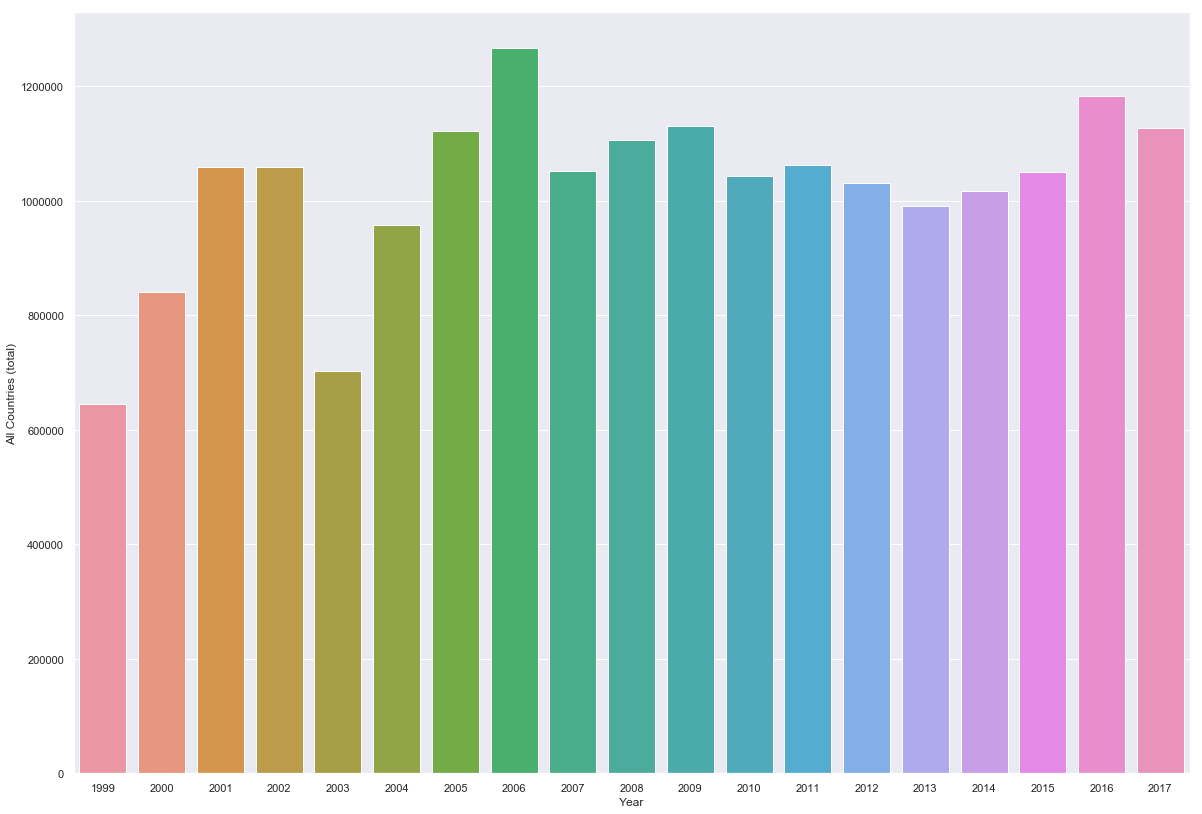

In [22]:
# total immigration rates per year
sns.barplot(x="Year", y="All Countries (total)", data=df)
sns.set(rc={'figure.figsize':(20,14)})